In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# Task1

In [3]:
data= pd.read_csv(r'C:\Users\anant\Downloads\DS3_C1_S2_Weather_Data_Practice.csv',parse_dates=True,index_col='Date')

In [4]:
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [8]:
len(data)

3650

In [12]:
lags=10
ma_lag10 = data.rolling(window=lags).mean()

In [13]:
df_ma = pd.DataFrame({'actual':data['Temp'], 'ma_lag10':ma_lag10['Temp']})
print(df_ma)

            actual  ma_lag10
Date                        
1981-01-01    20.7       NaN
1981-01-02    17.9       NaN
1981-01-03    18.8       NaN
1981-01-04    14.6       NaN
1981-01-05    15.8       NaN
...            ...       ...
1990-12-27    14.0     13.90
1990-12-28    13.6     13.54
1990-12-29    13.5     13.42
1990-12-30    15.7     13.45
1990-12-31    13.0     13.44

[3650 rows x 2 columns]


In [14]:
lags = 15 
ma_lag15 = data.rolling(window=lags).mean()

In [15]:
lags = 5 
ma_lag5 = data.rolling(window=lags).mean()

In [16]:
df_ma['ma_lag15']=ma_lag15
df_ma['ma_lag5']=ma_lag5

In [17]:
df_ma.tail()

,actual,ma_lag10,ma_lag15,ma_lag5
Date,,,,
1990-12-27,14.0,13.90,13.586667,13.08
1990-12-28,13.6,13.54,13.733333,13.02
1990-12-29,13.5,13.42,13.800000,13.72
1990-12-30,15.7,13.45,13.953333,14.28
1990-12-31,13.0,13.44,13.913333,13.96


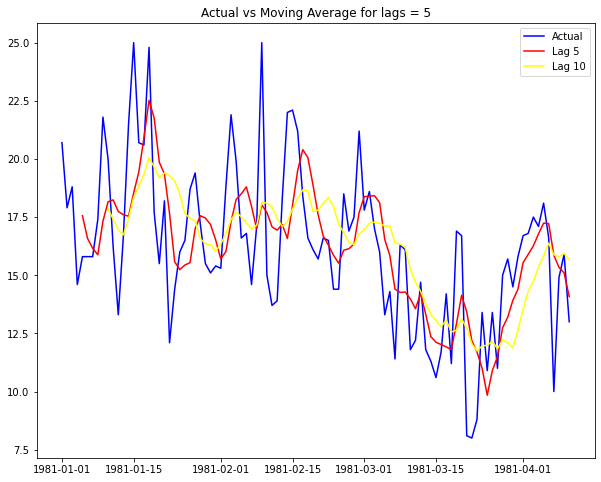

In [26]:
_,ax = plt.subplots(figsize=(10,8))
plt.plot(df_ma.actual[0:100], color='blue',label = 'Actual')
plt.plot(df_ma.ma_lag5[0:100], color='red', label = 'Lag 5') 
plt.plot(df_ma.ma_lag10[0:100],color='yellow',label='Lag 10')
plt.title('Actual vs Moving Average for lags = ' + str(lags)) 
plt.legend() 
plt.show()

# Task2

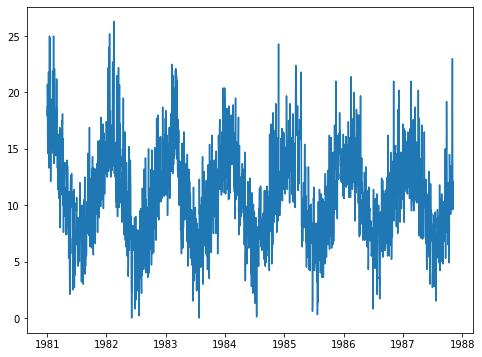

In [36]:
plt.subplots(figsize=(8,6))
plt.plot(data[0:2500])

### There is Seasonality but no trend in the data

# Task3

In [37]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [38]:
def checkstationarity(data):
    pvalue=adfuller(data)[1]
    
    if(pvalue < 0.05):
        ret = "pvalue={}.Model is stationary.Proceed to model building".format(pvalue)
        
    else:
        ret = "pvalue={}.Model is not stationary.Difference the data before model building".format(pvalue)
    return(ret)

In [39]:
checkstationarity(data)

'pvalue=0.00024708263003611787.Model is stationary.Proceed to model building'

### There is no trend and avg is in middle of plot. Hence data is stationary

# Task4

### Simple Exponent Smoothing

In [40]:
def simplesmoothing(data,alpha): 
    model =SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False) 
    pdct = model.fittedvalues 
    return(pdct)

In [41]:
d_simple_exp = {} 
alphas = [0,0.2,0.5,0.75,1] 
for a in alphas: 
    pdct = simplesmoothing(data,a) 
    d_simple_exp[a] = pdct

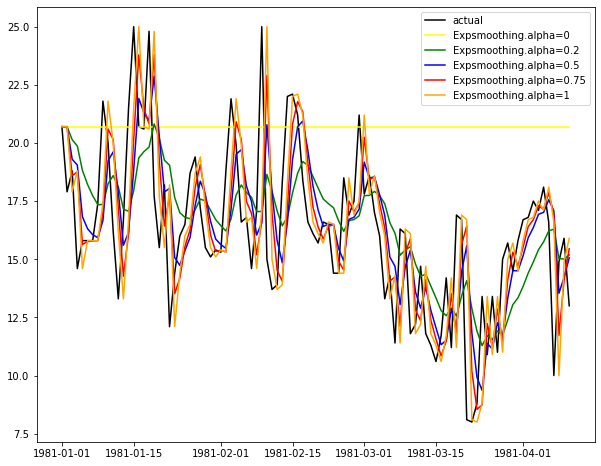

In [43]:
_,ax = plt.subplots(figsize=(10,8))
colors = ['yellow','green','blue','red','orange']
plt.plot(data[0:100],color='black',label='actual')

for i in range(len(colors)):
    plt.plot(d_simple_exp[alphas[i]][0:100],color=colors[i],label='Expsmoothing.alpha={}'.format(alphas[i]))
plt.legend()

### Double Exponent Smoothing

In [44]:
alpha=[0.1,0.2,0.3,0.4]
beta=[0.2,0.3,0.4,0.5]
d_exp2={}

In [45]:
for a in alpha:
    for b in beta:
        model=ExponentialSmoothing(data,trend='additive',seasonal='additive',seasonal_periods=12).fit(smoothing_level=a,smoothing_slope=b)
        f=model.fittedvalues
        k=str(a)+":"+str(b)
        d_exp2[k]=f

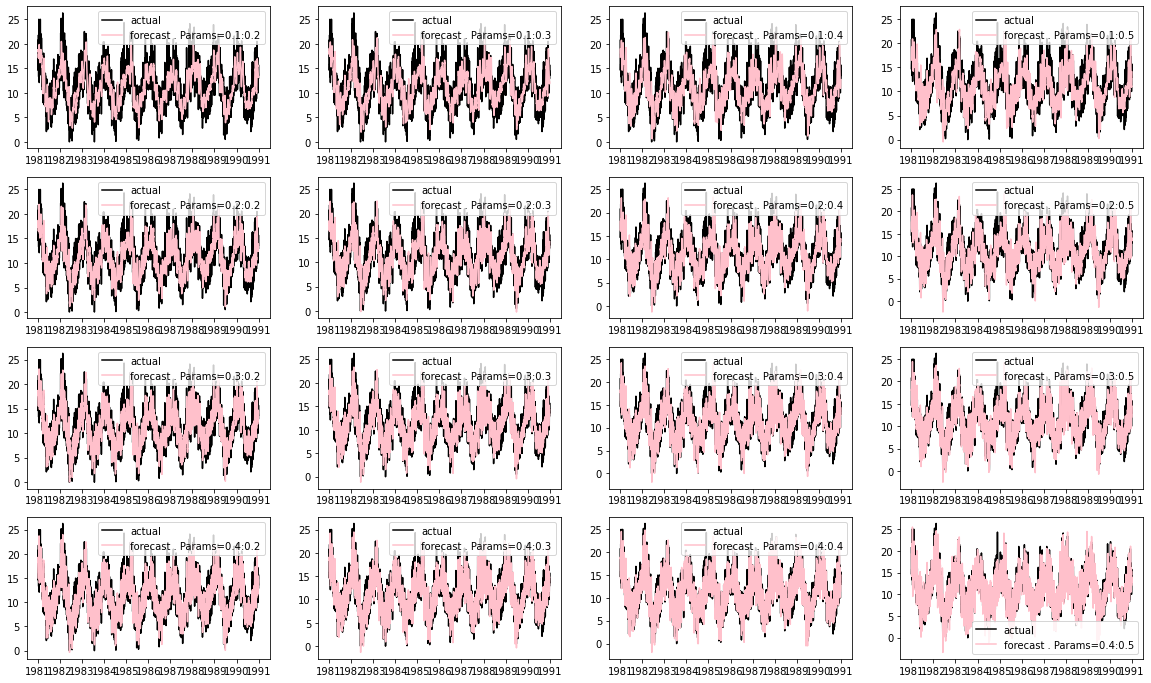

In [46]:
rows=4; cols=4
_,ax=plt.subplots(rows,cols,figsize=(20,12))
k=list(d_exp2.keys())
for i in range(len(d_exp2)):
    plt.subplot(rows,cols,i+1)
    plt.plot(data,color='black',label='actual')
    plt.plot(d_exp2[k[i]],color='pink',label='forecast . Params={}'.format(k[i]))
    plt.legend()

### Triple Exponent Smoothing

In [47]:
alpha=[0.1,0.3];beta=[0.2,0.5];gamma=[0.15,0.45]
d_exp3={}

In [48]:
for a in alpha:
    for b in beta:
        for g in gamma:
            model=ExponentialSmoothing(data,trend='additive',seasonal='additive',seasonal_periods=12).fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
            f=model.fittedvalues
            k=str(a)+":"+str(b)+":"+str(g)
            d_exp3[k]=f

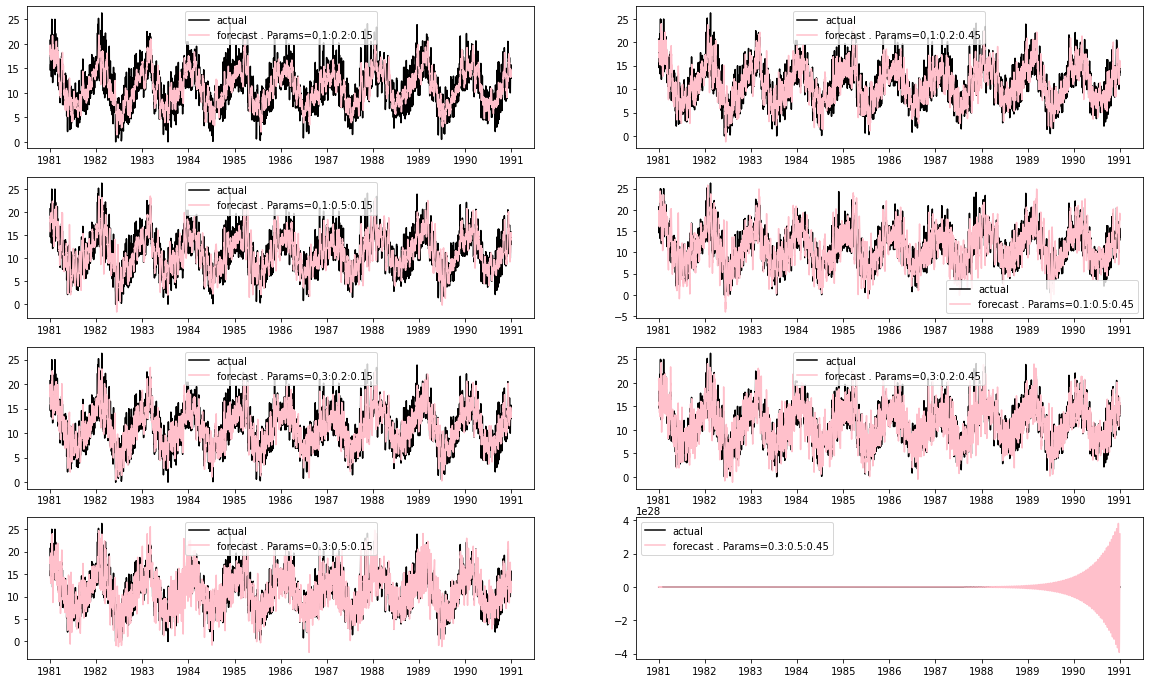

In [49]:
rows=4; cols=2
_,ax=plt.subplots(rows,cols,figsize=(20,12))
k=list(d_exp3.keys())
for i in range(len(d_exp3)):
    plt.subplot(rows,cols,i+1)
    plt.plot(data,color='black',label='actual')
    plt.plot(d_exp3[k[i]],color='pink',label='forecast . Params={}'.format(k[i]))
    plt.legend()

# Final Conclusion

### As this dataset has seasonality but no trend moving average technique will work best for smoothing of the data